## In house Calculations of Eastern Bering Sea Ice Extent in the manner of the SeaIce V3 product below.

### Define boundaries and cycle through all Bootstrap/NRT data

BS - 178E to Alaska (for EBS), 65.666N - all available points south.

We want to compare to the Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index) which does a more comprehensive job of masking out the basin then the simple box, but we are only interested in the ice over the EBS shelf.  A 5day trailing average is applied to the regional extent product.

### SeaIce Extent V3 - Daily Updated

__pyversion__==3.7   
__author__==S.Bell

__general info__ https://nsidc.org/data/g02135   
__datasource__ ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx

See https://blogs.helmholtz.de/polarpredictionmatters/2018/07/polar-forecasts-against-impacts-of-declining-bering-sea-ice-on-alaska-coastal-communities-part-1/ for reference.

Sources and Citations (see data)
- Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index)

- Fetterer, F., K. Knowles, W. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. [Indicate subset used]. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. [Date Accessed].

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import datetime


In [2]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [3]:
#fid = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx'
fid = '/Users/bell/in_and_outbox/Ongoing_Analysis/SeaIce_Analysis/BeringSea_IceExtent/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0 EBS edit.xlsx'
page = 'EBering-Extent-km^2' #Bering-Area-km^2

In [4]:
dfe = pd.read_excel(fid,sheet_name=page)

In [15]:
dfe = dfe.interpolate()
dfe['doy_y2'] = dfe.index+365

dfmean = dfe.copy()
dfmean.drop(columns=[2018,2017,2016,2015],inplace=True)
dfmean['avg'] = dfmean.drop(59,axis=0).drop(['month','day'], axis=1).mean(axis=1)

#make missing days after present day
dfe[2019][dfe[2019].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan
#make missing days select day
dfe[2019][dfe[2019].index > int(datetime.datetime.strftime(datetime.datetime(2019,4,15),'%j'))] = np.nan


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


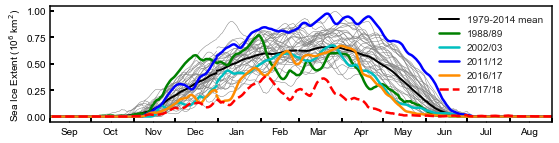

In [21]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l3 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l4 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l5 = ax1.plot(dfe.index,dfe[2016]/1e6,'darkorange',linewidth=2.5,label='2016/17')
l6 = ax1.plot(dfe.index,dfe[2017]/1e6,'r--',linewidth=2.5,label='2017/18')
#l7 = ax1.plot(dfe.index,dfe[2018]/1e6,'y-',linewidth=2.5,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'darkorange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r--',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'y-',linewidth=2.5,label='')

plt.legend()
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)

plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig1.png',dpi=300)
fig.savefig('images/EBS_fig1.svg',dpi=300)

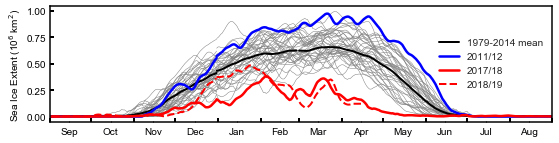

In [20]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
#l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
#l3 = ax1.plot(dfe.index,dfe[2007]/1e6,'b--',linewidth=2.5,label='2000/01')
#l4 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l5 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
#l6 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l7 = ax1.plot(dfe.index,dfe[2017]/1e6,'r-',linewidth=2.5,label='2017/18')
l8 = ax1.plot(dfe.index,dfe[2018]/1e6,'r--',linewidth=2.,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
#plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2008]/1e6,'b--',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'r--',linewidth=2.,label='')

plt.legend(loc='right')
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)
    
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig2.png',dpi=300)
fig.savefig('images/EBS_fig2.svg',dpi=300)

Isolate events in Northerly Winds that lead to anomolous Ice (Stabeno and Bell 2019, in press)

In [8]:
dfe.max()

day               31.0000
Unnamed: 2       366.0000
1978d         383767.9470
1979d         661770.4800
1980d         827668.9490
1981d         770703.6750
1982d         682300.8760
1983d         810921.0520
1984d         934000.8720
1985d         797773.0880
1986d         809786.9450
1987d         649913.3760
1988d         879466.3820
1989d         803650.2450
1990d         807314.7680
1991d         887799.1970
1992d         834340.0930
1993d         738578.9280
1994d         800519.8680
1995d         873416.5690
1996d         662554.0420
1997d         804306.5750
1998d         846030.9700
1999d         810325.9430
2000d         911567.8800
2001d         668993.1680
2002d         893382.0900
2003d         678551.4200
2004d         753608.3780
2005d         649258.6180
                 ...     
1991          879693.6068
1992          822760.0764
1993          725222.9502
1994          789468.5308
1995          868230.5798
1996          646381.9674
1997          785993.4604
1998        